# Trabajo Tesis: Preprocesamiento

### Librerias y bases

In [1]:
import numpy as np
import pandas as pd
import os
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter
from tqdm import tqdm


In [3]:
os.chdir('c:/Users/artur/OneDrive/Documents/TrabajoTesis') 
#os.chdir('C:/Users/admin/OneDrive/Documents/TrabajoTesis')

In [4]:
df = pd.read_excel('Cluster/Faenas25.xlsx')

In [ ]:
# Limpiar nombres de columnas
df.columns = ['RutEmpresa' if col == 'RutEmpresa' else col.lstrip() for col in df.columns]

# Limpiar espacios dentro de las columnas (excepto RutEmpresa)
for col in df.select_dtypes(include='object').columns:
    if col != 'RutEmpresa':
        df[col] = df[col].str.strip()


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28319 entries, 0 to 28318
Data columns (total 27 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   RutEmpresa                   28319 non-null  object 
 1    NombreEmpresa               28319 non-null  object 
 2    RegionFaena                 28319 non-null  object 
 3    ProvinciaFaena              28319 non-null  object 
 4    ComunaFaena                 28319 non-null  object 
 5    NombreFaena                 28319 non-null  object 
 6    CategoriaFaena              28319 non-null  object 
 7    IdFaena                     28319 non-null  int64  
 8    RegionInstalacion           28319 non-null  object 
 9    ProvinciaInstalacion        28319 non-null  object 
 10   ComunaInstalacion           28319 non-null  object 
 11   NombreInstalacion           28319 non-null  object 
 12   IdTipoInstalacion           28319 non-null  int64  
 13   TipoInstalacion

### EDA preliminar

In [ ]:
print(df['TipoInstalacion'].unique())


['TALLERES Y MAESTRANZA' 'EXPLORACION DE SUPERFICIE' 'MINA SUBTERRANEA'
 'MINA RAJO ABIERTO' 'DEPÓSITO RMM - ESTÉRILES' 'BODEGA' 'CAMPAMENTO'
 'POLVORIN' 'ADMINISTRACIÓN - OFICINA' 'PLANTA CHANCADO'
 'DEPÓSITO RMM - MINERAL DE BAJA LEY' 'LIXIVIACION' 'PLANTA CONCENTRADORA'
 'SUB-ESTACION ELECTRICA' 'DEPÓSITO - TRANQUE DE RELAVES'
 'CANCHA DE ACOPIO' 'MUESTRERA Y/O LABORATORIO' 'PUERTO DE EMBARQUE'
 'PLANTA DIMENSIONAMIENTO Y CORTE' 'PLANTA MOLIENDA' 'PLANTA ESPESADORES'
 'PLANTA FILTRO' 'PILAS DE FLOTACION' 'DEPÓSITO - FILTRADOS'
 'PLANTA EXTRACCIÓN POR SOLVENTES' 'PISCINAS DE EMERGENCIA'
 'ESTACION DE COMPRESORES' 'ESPESADORES' 'MINERODUCTO'
 'ESTACION DE BOMBEO' 'FUNDICION' 'CASA DE FUERZA' 'SALA DE CONTROL'
 'PLANTA DE CONVERSION' 'PLANTA DE ACIDO' 'CORREA TRANSPORTADORA'
 'CENTRAL - GAS' 'BATERIA DE RECEPCIÓN - PETRÓLEO' 'CALENTADOR - PETRÓLEO'
 'POZO DE PETROLEO' 'DEPÓSITO - EMBALSES'
 'TRAMPAS DE RECEPCIÓN/LANZAMIENTO HC' 'POZO DE GAS'
 'PLANTA QUÍMICA DE CONVERSIÓN' 'POZOS DE EX

In [ ]:
from IPython.display import display, HTML

# Crear un DataFrame con nombres de columnas claros
df_counts = (
    df['TipoInstalacion']
    .value_counts()
    .rename_axis('TipoInstalacion')
    .reset_index(name='count')
)

# Mostrar como HTML desplazable
html = (
    "<div style='height:300px; overflow:auto;'>"
    + df_counts.to_html(index=False)
    + "</div>"
)
display(HTML(html))


TipoInstalacion,count
MINA SUBTERRANEA,9100
MINA RAJO ABIERTO,3716
DEPÓSITO RMM - ESTÉRILES,2884
CAMPAMENTO,1766
EXPLORACION DE SUPERFICIE,1659
POLVORIN,1595
DEPÓSITO RMM - MINERAL DE BAJA LEY,736
PLANTA CONCENTRADORA,672
TALLERES Y MAESTRANZA,644
DEPÓSITO - TRANQUE DE RELAVES,592


In [ ]:
df['Estado'].value_counts()

Estado
ACTIVA                                 10834
ABANDONADA                             10134
IRREGULAR OPERATIVA                     2204
INACTIVA                                1508
EN REVISIÓN DE PROYECTO                 1358
EXPLORACIÓN FINALIZADA                   715
CIERRE FINAL                             577
PROYECTADA                               375
CIERRE TEMPORAL                          331
PARALIZADA POR SANCION                   242
PARALIZACIÓN POR MEDIDA PROVISIONAL       41
Name: count, dtype: int64

CategoriaFaena,count
CATEGORIA D,20100
CATEGORIA C,3601
CATEGORIA A,2941
CATEGORIA B,849
SIN CATEGORIA,828


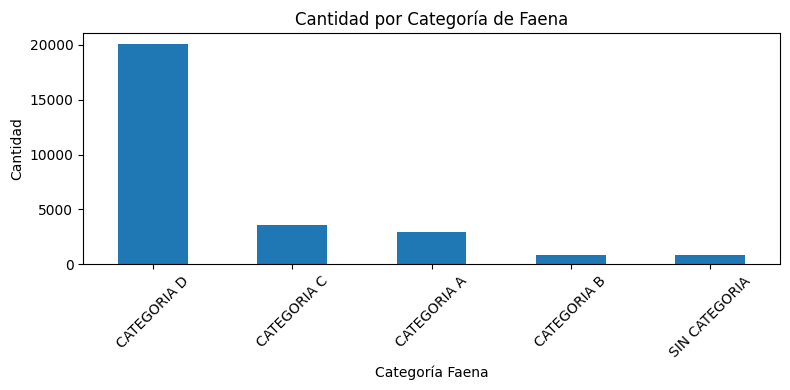

In [ ]:
from IPython.display import display, HTML

df_cat = (
    df['CategoriaFaena']
    .value_counts()
    .rename_axis('CategoriaFaena')
    .reset_index(name='count')
)

html = (
    "<div style='max-height:300px; overflow-y:auto; font-family:Arial; font-size:14px;'>"
    + df_cat.to_html(index=False, border=0)
    + "</div>"
)

display(HTML(html))

# Gráfico de barras
import matplotlib.pyplot as plt

df_cat.plot(x='CategoriaFaena', y='count', kind='bar', legend=False, figsize=(8,4))
plt.xlabel('Categoría Faena')
plt.ylabel('Cantidad')
plt.title('Cantidad por Categoría de Faena')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd

# Table of NaN counts per column
nan_counts = df.isna().sum().to_frame(name='NaN_count')
display(nan_counts)

,NaN_count
RutEmpresa,0
NombreEmpresa,0
RegionFaena,0
ProvinciaFaena,0
ComunaFaena,0
NombreFaena,1
CategoriaFaena,0
IdFaena,0
RegionInstalacion,0
ProvinciaInstalacion,0


,RegionInstalacion,CantidadFaenas
0,ATACAMA,8113
1,COQUIMBO,7725
2,ANTOFAGASTA,4035
3,VALPARAISO,3934
4,METROPOLITANA DE SANTIAGO,1237
5,MAGALLANES Y DE LA ANTARTICA CHILENA,954
6,LIBERTADOR GENERAL BERNARDO OHIGGINS,681
7,TARAPACA,625
8,ARICA Y PARINACOTA,421
9,BIOBIO,342


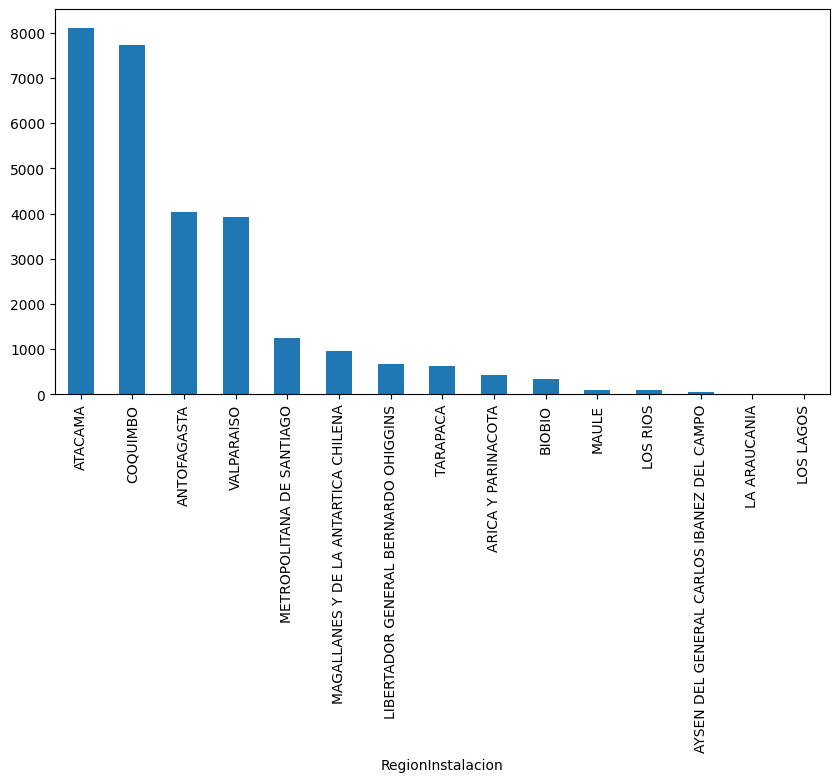

In [ ]:
region_counts = (
    df['RegionInstalacion']
    .value_counts()
    .rename_axis('RegionInstalacion')
    .reset_index(name='CantidadFaenas')
)
region_counts.plot(x='RegionInstalacion', y='CantidadFaenas', kind='bar', figsize=(10,5), legend=False)
display(region_counts.head(10))


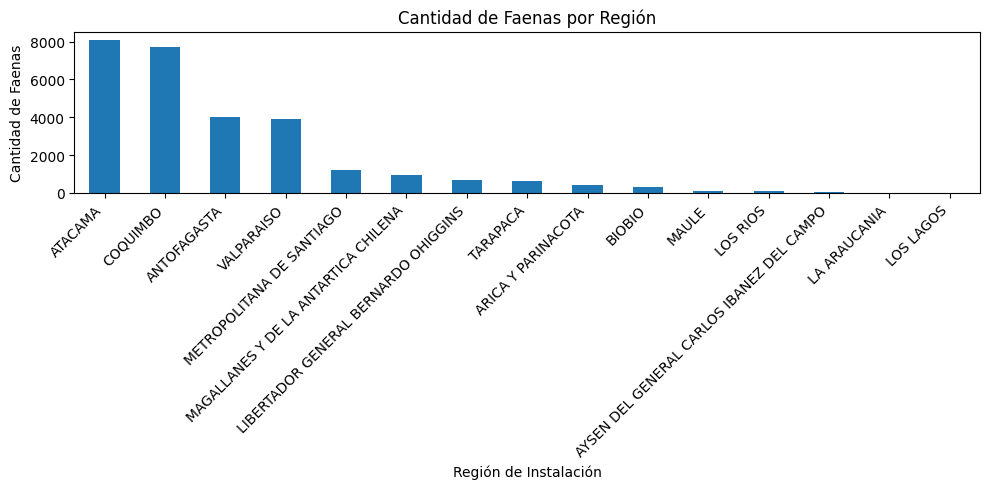

In [ ]:
region_counts.plot(x='RegionInstalacion', y='CantidadFaenas', kind='bar', figsize=(10,5), legend=False)
import matplotlib.pyplot as plt

plt.xlabel('Región de Instalación')
plt.ylabel('Cantidad de Faenas')
plt.title('Cantidad de Faenas por Región')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
top_empresas = (
    df['NombreEmpresa']
    .value_counts()
    .head(10)
    .reset_index()
    .rename(columns={'index': 'NombreEmpresa', 'NombreEmpresa': 'CantidadFaenas'})
)

html = (
    "<div style='max-height:300px; overflow-y:auto; font-family:Arial; font-size:14px;'>"
    + top_empresas.to_html(index=False, border=0)
    + "</div>"
)
display(HTML(html))

CantidadFaenas,count
Empresa Nacional del Petróleo,692
CORPORACION NACIONAL DEL COBRE (CODELCO),509
ANGLO AMERICAN SUR S.A.,387
EMPRESA NACIONAL DE MINERIA (ENAMI),336
FMA/P,193
CIA. MRA. DEL PACIFICO S.A.,180
JUAN AUGUSTO MUNIZAGA ROMAN,173
MINERA LAS CENIZAS S.A.,173
MINERA FLORIDA LTDA.,152
GREGORIO ENERGY FELL SPA,135


In [ ]:
df['RecursoPrimarioInstalacion']

0           COBRE
1           COBRE
2           COBRE
3          HIERRO
4           COBRE
           ...   
28314       COBRE
28315    SILICEOS
28316    SILICEOS
28317       COBRE
28318         ORO
Name: RecursoPrimarioInstalacion, Length: 28319, dtype: object

### Limpieza

In [ ]:
df = df[df['RecursoPrimarioInstalacion'] == 'COBRE']
df.shape

(21158, 27)

In [ ]:
df

,RutEmpresa,NombreEmpresa,RegionFaena,ProvinciaFaena,ComunaFaena,NombreFaena,CategoriaFaena,IdFaena,RegionInstalacion,ProvinciaInstalacion,...,IdInstalacion,Norte,Este,Cota,Huso,Datum,IdEstado,Estado,Latitud,Longitud
0,61703000-4,EMPRESA NACIONAL DE MINERIA (ENAMI),III,HUASCO,VALLENAR,PLANTA DE BENEFICIO DE MINERALES - VALLENAR,CATEGORIA B,153576,ATACAMA,HUASCO,...,2000016078,6839116.0,330003.0,538,19,PSAD-56,8,ACTIVA,-28.566725,-70.740064
1,76125921-0,CUPRUM RESOURCES CHILE SPA,IV,ELQUI,LA HIGUERA,LA VERDE,CATEGORIA D,20012162,COQUIMBO,ELQUI,...,2000016187,6743203.0,336885.0,1200,19,PSAD-56,169,INACTIVA,-29.432920,-70.683699
2,76362163-4,MINERA RUPERTO PATRICIO ORTIZ PALOMINOS,VI,COLCHAGUA,LOLOL,MINA LA VENUS,CATEGORIA D,20013211,LIBERTADOR GENERAL BERNARDO OHIGGINS,COLCHAGUA,...,2000017211,6160230.0,271326.0,134,19,PSAD-56,12,ABANDONADA,-34.677189,-71.498091
4,6891906-1,GARY NELSON MERCADO MALBRAN,III,CHAÑARAL,CHAÑARAL,DIEGO DAKAR 1/10,CATEGORIA D,20013237,ATACAMA,CHAÑARAL,...,2000018057,7078335.0,359170.0,531,19,PSAD-56,8,ACTIVA,-26.411292,-70.414104
12,76448510-6,SLM CASUALIDAD PRIMERA DE EL MANZANO,IV,ELQUI,ANDACOLLO,CASUALIDAD UNO,CATEGORIA D,20015093,COQUIMBO,ELQUI,...,2000019076,6657100.0,299764.0,917,19,PSAD-56,2169,IRREGULAR OPERATIVA,-30.204069,-71.082232
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28311,78131832-9,BALFENI SOLUTIONS SPA,IV,CHOAPA,CANELA,FAENA DON MARIO,CATEGORIA D,20389551,COQUIMBO,CHOAPA,...,2000557972,6544556.0,284169.0,1277,19,PSAD-56,5170,EN REVISIÓN DE PROYECTO,-31.216132,-71.267759
28312,78131832-9,BALFENI SOLUTIONS SPA,IV,CHOAPA,CANELA,FAENA DON MARIO,CATEGORIA D,20389551,COQUIMBO,CHOAPA,...,2000557973,6544044.0,284421.0,1199,19,PSAD-56,5170,EN REVISIÓN DE PROYECTO,-31.220795,-71.265226
28313,6188182-4,EDILIO GOMEZ OYARZUN,IV,CHOAPA,CANELA,LA ROSARIO 1 AL 20,CATEGORIA D,20346577,COQUIMBO,CHOAPA,...,2000551067,6507500.0,277700.0,458,19,PSAD-56,5170,EN REVISIÓN DE PROYECTO,-31.548972,-71.343902
28314,78110627-5,C & C MINERIA SpA,II,EL LOA,CALAMA,LA DESPRECIADA IV 1 AL 1O,CATEGORIA D,20388642,ANTOFAGASTA,EL LOA,...,2000554937,7451789.0,545590.0,3250,19,PSAD-56,5170,EN REVISIÓN DE PROYECTO,-23.044930,-68.557016


In [ ]:
df = df.drop(columns=[
    'RegionFaena', 'ProvinciaFaena', 'ComunaFaena', 'NombreFaena', 'IdFaena',
    'RegionInstalacion', 'NombreInstalacion', 'RecursoMineroInstalacion',
    'TipoRecursoInstalacion', 'IdInstalacion', 'Norte', 'Este', 'Datum'
])

## Modelo solo con latitud y longitud

c:\Users\admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


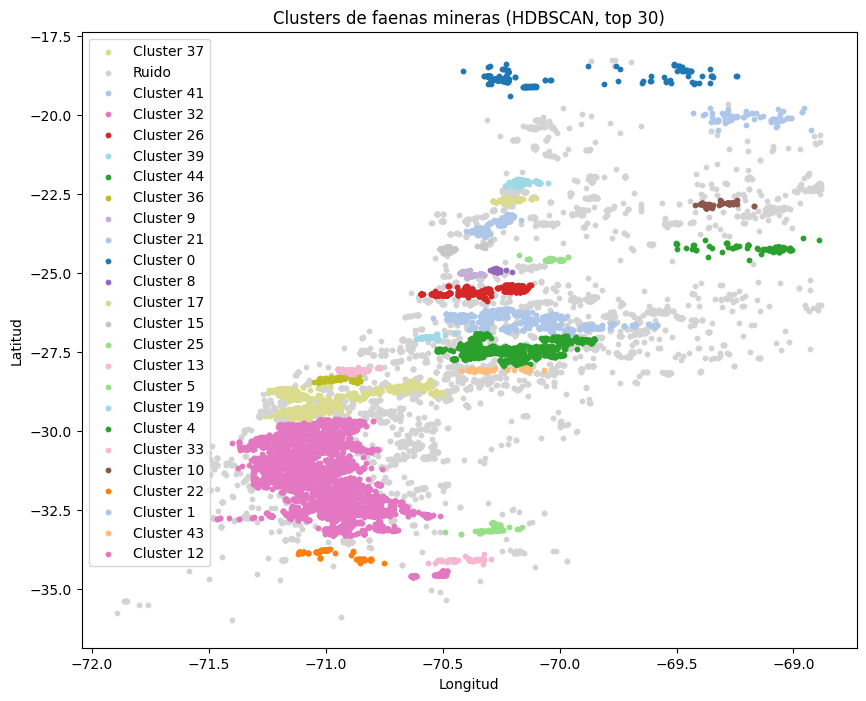

In [ ]:
import hdbscan
import matplotlib.pyplot as plt
import numpy as np

# === Step 1: Remove outliers using z-score ===
coords = df[['Longitud', 'Latitud']].to_numpy()
z_scores = np.abs((coords - coords.mean(axis=0)) / coords.std(axis=0))
mask = (z_scores[:,0] < 3) & (z_scores[:,1] < 3)  # keep points within 3 std dev
df_clean = df[mask].copy()
coords_clean = df_clean[['Longitud', 'Latitud']].to_numpy()

# === Step 2: Fit HDBSCAN on cleaned data ===
clusterer = hdbscan.HDBSCAN(
    min_cluster_size=30,       
    cluster_selection_epsilon=0.08
)
df_clean['cluster'] = clusterer.fit_predict(coords_clean)

# === Step 3: Keep only top 30 largest clusters ===
cluster_counts = df_clean['cluster'].value_counts()
top_clusters = cluster_counts.nlargest(25).index
df_clean['cluster'] = df_clean['cluster'].apply(lambda x: x if x in top_clusters else -1)

# === Step 4: Plot ===
plt.figure(figsize=(10,8))
cmap = plt.get_cmap('tab20')

clusters = df_clean['cluster'].unique()
for cluster in clusters:
    mask = df_clean['cluster'] == cluster
    if cluster == -1:
        plt.scatter(df_clean.loc[mask, 'Longitud'], df_clean.loc[mask, 'Latitud'],
                    color='lightgray', s=10, label='Ruido')
    else:
        plt.scatter(df_clean.loc[mask, 'Longitud'], df_clean.loc[mask, 'Latitud'],
                    color=cmap(cluster % 20), s=10, label=f'Cluster {cluster}')

plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.title('Clusters de faenas mineras (HDBSCAN, top 30)')
plt.legend()
plt.show()


In [ ]:
df = df[df['Estado'] == 'ACTIVA']

c:\Users\admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


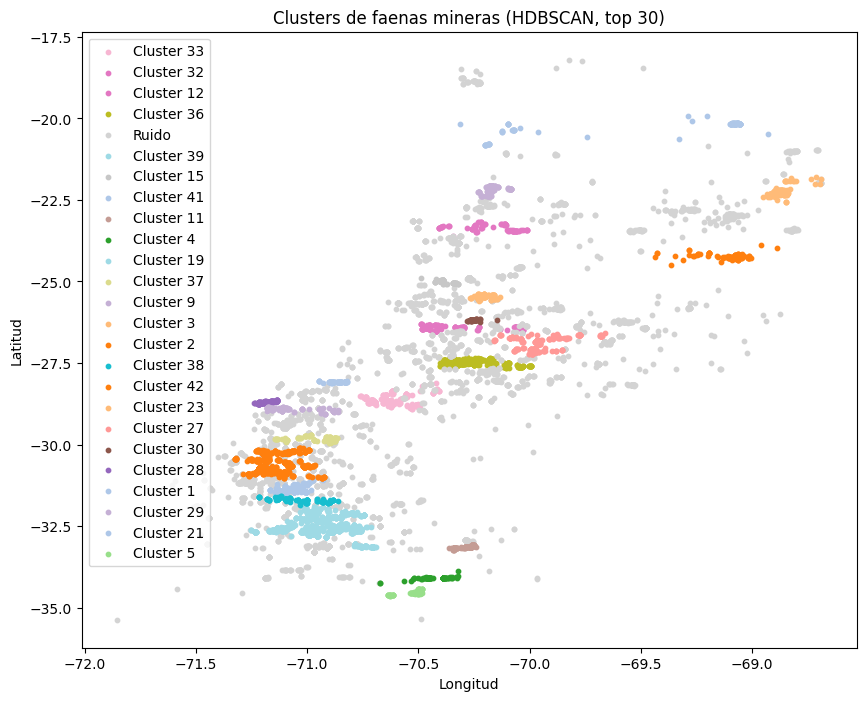

In [ ]:
import hdbscan
import matplotlib.pyplot as plt
import numpy as np

# === Step 1: Remove outliers using z-score ===
coords = df[['Longitud', 'Latitud']].to_numpy()
z_scores = np.abs((coords - coords.mean(axis=0)) / coords.std(axis=0))
mask = (z_scores[:,0] < 3) & (z_scores[:,1] < 3)  # keep points within 3 std dev
df_clean = df[mask].copy()
coords_clean = df_clean[['Longitud', 'Latitud']].to_numpy()

# === Step 2: Fit HDBSCAN on cleaned data ===
clusterer = hdbscan.HDBSCAN(
    min_cluster_size=30,       
    cluster_selection_epsilon=0.08
)
df_clean['cluster'] = clusterer.fit_predict(coords_clean)

# === Step 3: Keep only top 30 largest clusters ===
cluster_counts = df_clean['cluster'].value_counts()
top_clusters = cluster_counts.nlargest(25).index
df_clean['cluster'] = df_clean['cluster'].apply(lambda x: x if x in top_clusters else -1)

# === Step 4: Plot ===
plt.figure(figsize=(10,8))
cmap = plt.get_cmap('tab20')

clusters = df_clean['cluster'].unique()
for cluster in clusters:
    mask = df_clean['cluster'] == cluster
    if cluster == -1:
        plt.scatter(df_clean.loc[mask, 'Longitud'], df_clean.loc[mask, 'Latitud'],
                    color='lightgray', s=10, label='Ruido')
    else:
        plt.scatter(df_clean.loc[mask, 'Longitud'], df_clean.loc[mask, 'Latitud'],
                    color=cmap(cluster % 20), s=10, label=f'Cluster {cluster}')

plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.title('Clusters de faenas mineras (HDBSCAN, top 30)')
plt.legend()
plt.show()

In [ ]:
cols_keep = ['Latitud', 'Longitud', 'Cota']
df_dbscan = df[cols_keep].dropna()


In [ ]:
from sklearn.preprocessing import StandardScaler

X = df_dbscan[['Latitud', 'Longitud', 'Cota']]  # o solo ['Latitud', 'Longitud']
X_scaled = StandardScaler().fit_transform(X)


In [ ]:
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=0.5, min_samples=20)
labels = db.fit_predict(X_scaled)

df['cluster'] = labels


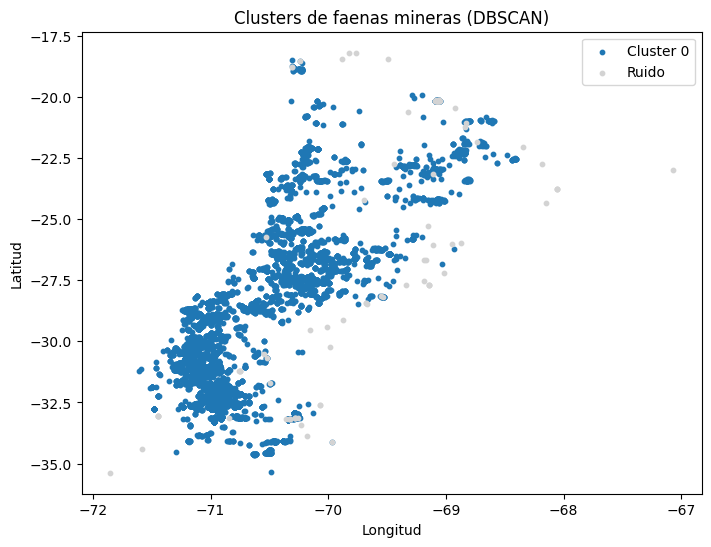

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(8,6))

# Obtener clusters únicos
clusters = df['cluster'].unique()

# Colormap
cmap = plt.get_cmap('tab10')

for cluster in clusters:
    mask = df['cluster'] == cluster
    if cluster == -1:
        # Ruido en gris
        plt.scatter(df.loc[mask, 'Longitud'], df.loc[mask, 'Latitud'],
                    color='lightgray', s=10, label='Ruido')
    else:
        plt.scatter(df.loc[mask, 'Longitud'], df.loc[mask, 'Latitud'],
                    color=cmap(cluster % 10), s=10, label=f'Cluster {cluster}')

plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.title('Clusters de faenas mineras (DBSCAN)')
plt.legend()
plt.show()



c:\Users\admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


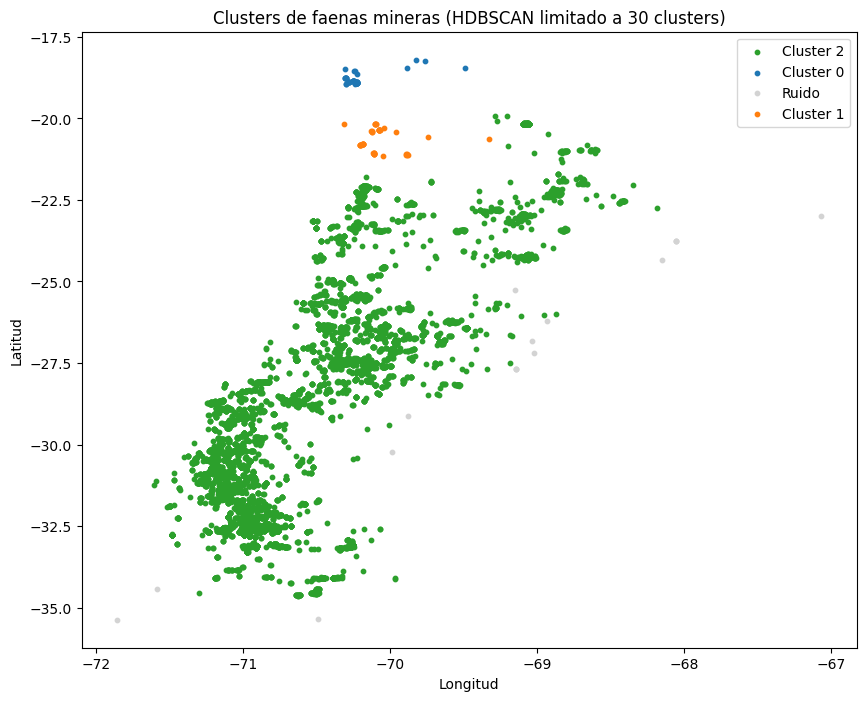

In [ ]:
import hdbscan
import matplotlib.pyplot as plt

coords = df[['Longitud', 'Latitud']].to_numpy()

# HDBSCAN with parameters tuned to limit clusters
clusterer = hdbscan.HDBSCAN(
    min_cluster_size=10,           # increase to reduce small clusters
    cluster_selection_epsilon=0.5  # increase to merge clusters
)
df['cluster'] = clusterer.fit_predict(coords)

# Keep only top 30 largest clusters, label the rest as noise (-1)
cluster_counts = df['cluster'].value_counts()
top_clusters = cluster_counts.nlargest(30).index
df['cluster'] = df['cluster'].apply(lambda x: x if x in top_clusters else -1)

# Plot
plt.figure(figsize=(10,8))
cmap = plt.get_cmap('tab10')
clusters = df['cluster'].unique()

for cluster in clusters:
    mask = df['cluster'] == cluster
    if cluster == -1:
        plt.scatter(df.loc[mask, 'Longitud'], df.loc[mask, 'Latitud'],
                    color='lightgray', s=10, label='Ruido')
    else:
        plt.scatter(df.loc[mask, 'Longitud'], df.loc[mask, 'Latitud'],
                    color=cmap(cluster % 10), s=10, label=f'Cluster {cluster}')

plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.title('Clusters de faenas mineras (HDBSCAN limitado a 30 clusters)')
plt.legend()
plt.show()




In [ ]:
import hdbscan

clusterer = hdbscan.HDBSCAN(min_cluster_size=5)
df['cluster'] = clusterer.fit_predict(df[['Longitud', 'Latitud']])


c:\Users\admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


### Ciudades

In [ ]:
df_sample = df.sample(frac=0.1, random_state=42).copy() 


In [ ]:
from geopy.distance import geodesic
import pandas as pd
from tqdm import tqdm

# Coordinates of the 15 cities
cities_coords = {
    "Santiago": (-33.4489, -70.6693),
    "Valparaíso": (-33.0472, -71.6127),
    "Concepción": (-36.8201, -73.0444),
    "La Serena": (-29.9037, -71.2489),
    "Coquimbo": (-29.9533, -71.3395),
    "Antofagasta": (-23.6500, -70.4000),
    "Temuco": (-38.7369, -72.5904),
    "Rancagua": (-34.1708, -70.7400),
    "Iquique": (-20.2307, -70.1350),
    "Puerto Montt": (-41.4694, -72.9420),
    "Talca": (-35.4261, -71.6550),
    "Arica": (-18.4783, -70.3126),
    "Chillán": (-36.6066, -72.1034),
    "Los Ángeles": (-37.4600, -72.3500),
    "Copiapó": (-27.3668, -70.3326),
    "Valdivia": (-39.8196, -73.2459)
}

# Function to find nearest city
def nearest_city(lat, lon):
    closest_city = min(cities_coords.keys(), key=lambda city: geodesic((lat, lon), cities_coords[city]).km)
    return closest_city

# Apply to your dataframe
tqdm.pandas()
df_sample["Closest_City"] = df_sample.progress_apply(
    lambda row: nearest_city(row["Latitud"], row["Longitud"]), axis=1
)

print(df_sample.head())


100%|██████████| 792/792 [00:01<00:00, 533.28it/s]

       RutEmpresa                       NombreEmpresa CategoriaFaena  \
23140   8597256-1               ALBERTO REYES ARDILES    CATEGORIA D   
23555  12399229-6   CRISTIAN DEL CARMEN VARAS MONDACA    CATEGORIA D   
11772  91614000-2        CIA. MINERA CERRO NEGRO S.A.    CATEGORIA A   
13287  76775983-5  SOCIEDAD LARA Y CÍA FORTALEZA LTDA    CATEGORIA C   
18094  99569250-3            MINERA LOS PORTALES S.A.    CATEGORIA D   

      ProvinciaInstalacion ComunaInstalacion  IdTipoInstalacion  \
23140               HUASCO          VALLENAR               1337   
23555              PETORCA           PETORCA               1291   
11772              PETORCA           CABILDO               1294   
13287          ANTOFAGASTA      SIERRA GORDA               1291   
18094          ANTOFAGASTA            TALTAL               1297   

                     TipoInstalacion RecursoPrimarioInstalacion  Cota  Huso  \
23140       DEPÓSITO RMM - ESTÉRILES                      COBRE  1034    19   
23555 

In [ ]:
df_sample

,RutEmpresa,NombreEmpresa,CategoriaFaena,ProvinciaInstalacion,ComunaInstalacion,IdTipoInstalacion,TipoInstalacion,RecursoPrimarioInstalacion,Cota,Huso,IdEstado,Estado,Latitud,Longitud,cluster,Closest_City
23140,8597256-1,ALBERTO REYES ARDILES,CATEGORIA D,HUASCO,VALLENAR,1337,DEPÓSITO RMM - ESTÉRILES,COBRE,1034,19,8,ACTIVA,-28.600084,-70.576489,223,Copiapó
23555,12399229-6,CRISTIAN DEL CARMEN VARAS MONDACA,CATEGORIA D,PETORCA,PETORCA,1291,MINA SUBTERRANEA,COBRE,680,19,8,ACTIVA,-32.240913,-70.869574,473,Valparaíso
11772,91614000-2,CIA. MINERA CERRO NEGRO S.A.,CATEGORIA A,PETORCA,CABILDO,1294,DEPÓSITO - TRANQUE DE RELAVES,COBRE,580,19,8,ACTIVA,-32.578326,-70.885386,385,Valparaíso
13287,76775983-5,SOCIEDAD LARA Y CÍA FORTALEZA LTDA,CATEGORIA C,ANTOFAGASTA,SIERRA GORDA,1291,MINA SUBTERRANEA,COBRE,1320,19,8,ACTIVA,-23.150352,-69.948618,18,Antofagasta
18094,99569250-3,MINERA LOS PORTALES S.A.,CATEGORIA D,ANTOFAGASTA,TALTAL,1297,EXPLORACION DE SUPERFICIE,COBRE,385,19,8,ACTIVA,-25.693712,-70.521801,156,Copiapó
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25341,7852829-K,ANDRES BELISARIO FELIU ESCUDERO,CATEGORIA D,COLCHAGUA,SAN FERNANDO,6999,POLVORIN,COBRE,2600,19,8,ACTIVA,-34.601762,-70.614043,40,Rancagua
26472,78148758-9,PRODUCCIÓN Y EXTRACCIÓN MINERA LTDA,CATEGORIA C,HUASCO,VALLENAR,1291,MINA SUBTERRANEA,COBRE,2576,19,8,ACTIVA,-28.179637,-70.098590,222,Copiapó
26699,77762940-9,ANGLO AMERICAN SUR S.A.,CATEGORIA A,CHACABUCO,COLINA,8086,CASA DE FUERZA,COBRE,779,19,8,ACTIVA,-33.141201,-70.705232,85,Santiago
8815,76079669-7,MINERA ANTUCOYA LIMITADA,CATEGORIA A,ANTOFAGASTA,MEJILLONES,1348,ADMINISTRACIÓN - OFICINA,COBRE,1721,19,8,ACTIVA,-22.622254,-69.839055,13,Antofagasta


In [ ]:
"""from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter
from tqdm import tqdm

# Ciudades permitidas
allowed_cities = [
    "Santiago", "Valparaíso", "Concepción", "La Serena", "Coquimbo",
    "Antofagasta", "Temuco", "Rancagua", "Iquique", "Puerto Montt",
    "Talca", "Arica", "Chillán", "Los Ángeles", "Copiapó", "Valdivia"
]

# Take a 10% random sample
df_sample = df.sample(frac=0.1, random_state=42).copy() 

# Set up Nominatim (OSM)
geolocator = Nominatim(user_agent="city_locator_sample")
reverse = RateLimiter(geolocator.reverse, min_delay_seconds=1)  # respect API limits

# Function to get nearest allowed city
def get_city(lat, lon):
    try:
        location = reverse((lat, lon), exactly_one=True)
        if location and "address" in location.raw:
            address = location.raw["address"]
            city = (
                address.get("city")
                or address.get("town")
                or address.get("village")
                or address.get("hamlet")
                or address.get("municipality")
                or address.get("county")
            )
            # Solo devolver si está en la lista permitida
            if city in allowed_cities:
                return city
        return None
    except Exception:
        return None

# Apply to sample
tqdm.pandas()
df_sample["Closest_City"] = df_sample.progress_apply(
    lambda row: get_city(row["Latitud"], row["Longitud"]), axis=1
)

# Inspect results
print(df_sample.head())
"""


'from geopy.geocoders import Nominatim\nfrom geopy.extra.rate_limiter import RateLimiter\nfrom tqdm import tqdm\n\n# Ciudades permitidas\nallowed_cities = [\n    "Santiago", "Valparaíso", "Concepción", "La Serena", "Coquimbo",\n    "Antofagasta", "Temuco", "Rancagua", "Iquique", "Puerto Montt",\n    "Talca", "Arica", "Chillán", "Los Ángeles", "Copiapó", "Valdivia"\n]\n\n# Take a 10% random sample\ndf_sample = df.sample(frac=0.1, random_state=42).copy() \n\n# Set up Nominatim (OSM)\ngeolocator = Nominatim(user_agent="city_locator_sample")\nreverse = RateLimiter(geolocator.reverse, min_delay_seconds=1)  # respect API limits\n\n# Function to get nearest allowed city\ndef get_city(lat, lon):\n    try:\n        location = reverse((lat, lon), exactly_one=True)\n        if location and "address" in location.raw:\n            address = location.raw["address"]\n            city = (\n                address.get("city")\n                or address.get("town")\n                or address.get("vill

In [ ]:
from IPython.display import display, HTML

html = "<div style='height:300px; overflow:auto;'>" + df_sample['Closest_City'].value_counts().to_frame().to_html() + "</div>"
display(HTML(html))

,count
Closest_City,
Copiapó,215
Antofagasta,140
Valparaíso,138
Coquimbo,115
La Serena,73
Santiago,56
Rancagua,28
Iquique,22
Arica,4


In [ ]:
import requests
from tqdm import tqdm
import pandas as pd
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter

# Get city coordinates (once per unique city)
geolocator = Nominatim(user_agent="truck_routing_demo")
reverse = RateLimiter(geolocator.geocode, min_delay_seconds=1)

def get_city_coords(city_name):
    try:
        location = geolocator.geocode(city_name + ", Chile")  # add country context
        if location:
            return location.latitude, location.longitude
    except:
        return None, None
    return None, None

# Create a mapping of city -> (lat, lon)
cities = df_sample["Closest_City"].dropna().unique()
city_coords = {}
for c in tqdm(cities, desc="Geocoding city centers"):
    lat, lon = get_city_coords(c)
    city_coords[c] = (lat, lon)

# Function to query OSRM
def get_travel_time(lat1, lon1, city):
    lat2, lon2 = city_coords.get(city, (None, None))
    if lat2 is None or lon2 is None:
        return None
    url = f"https://router.project-osrm.org/route/v1/driving/{lon1},{lat1};{lon2},{lat2}?overview=false"
    try:
        response = requests.get(url)
        data = response.json()
        if data.get("routes"):
            duration_sec = data["routes"][0]["duration"]
            return duration_sec / 60  # convert to minutes
    except Exception:
        return None
    return None

# Apply to DataFrame
tqdm.pandas()
df_sample["TravelTime_Truck_min"] = df_sample.progress_apply(
    lambda row: get_travel_time(row["Latitud"], row["Longitud"], row["Closest_City"]),
    axis=1
)

# Done!
print(df_sample[["Latitud", "Longitud", "Closest_City", "TravelTime_Truck_min"]].head())


100%|██████████| 792/792 [13:47<00:00,  1.04s/it]

         Latitud   Longitud Closest_City  TravelTime_Truck_min
23140 -28.600084 -70.576489      Copiapó            153.998333
23555 -32.240913 -70.869574   Valparaíso            156.455000
11772 -32.578326 -70.885386   Valparaíso            154.816667
13287 -23.150352 -69.948618  Antofagasta            115.730000
18094 -25.693712 -70.521801      Copiapó            266.420000


In [ ]:
df_sample

,RutEmpresa,NombreEmpresa,CategoriaFaena,ProvinciaInstalacion,ComunaInstalacion,IdTipoInstalacion,TipoInstalacion,RecursoPrimarioInstalacion,Cota,Huso,IdEstado,Estado,Latitud,Longitud,cluster,Closest_City,TravelTime_Truck_min
23140,8597256-1,ALBERTO REYES ARDILES,CATEGORIA D,HUASCO,VALLENAR,1337,DEPÓSITO RMM - ESTÉRILES,COBRE,1034,19,8,ACTIVA,-28.600084,-70.576489,223,Copiapó,153.998333
23555,12399229-6,CRISTIAN DEL CARMEN VARAS MONDACA,CATEGORIA D,PETORCA,PETORCA,1291,MINA SUBTERRANEA,COBRE,680,19,8,ACTIVA,-32.240913,-70.869574,473,Valparaíso,156.455000
11772,91614000-2,CIA. MINERA CERRO NEGRO S.A.,CATEGORIA A,PETORCA,CABILDO,1294,DEPÓSITO - TRANQUE DE RELAVES,COBRE,580,19,8,ACTIVA,-32.578326,-70.885386,385,Valparaíso,154.816667
13287,76775983-5,SOCIEDAD LARA Y CÍA FORTALEZA LTDA,CATEGORIA C,ANTOFAGASTA,SIERRA GORDA,1291,MINA SUBTERRANEA,COBRE,1320,19,8,ACTIVA,-23.150352,-69.948618,18,Antofagasta,115.730000
18094,99569250-3,MINERA LOS PORTALES S.A.,CATEGORIA D,ANTOFAGASTA,TALTAL,1297,EXPLORACION DE SUPERFICIE,COBRE,385,19,8,ACTIVA,-25.693712,-70.521801,156,Copiapó,266.420000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25341,7852829-K,ANDRES BELISARIO FELIU ESCUDERO,CATEGORIA D,COLCHAGUA,SAN FERNANDO,6999,POLVORIN,COBRE,2600,19,8,ACTIVA,-34.601762,-70.614043,40,Rancagua,76.175000
26472,78148758-9,PRODUCCIÓN Y EXTRACCIÓN MINERA LTDA,CATEGORIA C,HUASCO,VALLENAR,1291,MINA SUBTERRANEA,COBRE,2576,19,8,ACTIVA,-28.179637,-70.098590,222,Copiapó,376.206667
26699,77762940-9,ANGLO AMERICAN SUR S.A.,CATEGORIA A,CHACABUCO,COLINA,8086,CASA DE FUERZA,COBRE,779,19,8,ACTIVA,-33.141201,-70.705232,85,Santiago,49.916667
8815,76079669-7,MINERA ANTUCOYA LIMITADA,CATEGORIA A,ANTOFAGASTA,MEJILLONES,1348,ADMINISTRACIÓN - OFICINA,COBRE,1721,19,8,ACTIVA,-22.622254,-69.839055,13,Antofagasta,161.503333


In [ ]:
df = pd.read_csv("data/df_sample.csv")

In [ ]:
df

,RutEmpresa,NombreEmpresa,CategoriaFaena,ProvinciaInstalacion,ComunaInstalacion,IdTipoInstalacion,TipoInstalacion,RecursoPrimarioInstalacion,Cota,Huso,IdEstado,Estado,Latitud,Longitud,Closest_City,TravelTime_Truck_min
0,76043345-4,SCM CAMARONES,CATEGORIA D,ARICA,ARICA,8073,CANCHA DE ACOPIO,COBRE,181,19,12,ABANDONADA,-18.766115,-70.305866,Arica,64.160000
1,10267925-3,OMAR MUÑOZ ALVAREZ,CATEGORIA D,CHOAPA,CANELA,1291,MINA SUBTERRANEA,COBRE,1100,19,8,ACTIVA,-31.187356,-71.307579,Coquimbo,186.573333
2,76828678-7,MINERA JESSICA PAMELA PEREZ SILVA EIRL,CATEGORIA D,PETORCA,CABILDO,8076,EXPLORACIÓN SUBTERRÁNEA,COBRE,475,19,8,ACTIVA,-32.413654,-70.932892,Valparaíso,140.648333
3,76102677-1,MINERA HMC S.A.,CATEGORIA A,ANTOFAGASTA,MEJILLONES,1350,TALLERES Y MAESTRANZA,COBRE,765,19,8,ACTIVA,-22.676943,-70.189357,Antofagasta,132.145000
4,12774379-7,JULIO CESAR CONTRERAS ELGUETA,CATEGORIA D,SAN FELIPE,CATEMU,1306,PLANTA EXTRACCIÓN POR SOLVENTES,COBRE,789,19,12,ABANDONADA,-32.682402,-70.976678,Valparaíso,116.875000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2111,76726970-6,SOCIEDAD MINERA LA ESTRELLA NORTE,CATEGORIA D,ELQUI,LA HIGUERA,1291,MINA SUBTERRANEA,COBRE,485,19,12,ABANDONADA,-29.335595,-71.109707,La Serena,70.813333
2112,11506964-0,SAUL CHIRINO VALENZUELA,CATEGORIA C,CHAÑARAL,DIEGO DE ALMAGRO,1337,DEPÓSITO RMM - ESTÉRILES,COBRE,1905,19,8,ACTIVA,-26.867926,-70.033074,Copiapó,120.755000
2113,6062657-K,VICTOR SAAVEDRA NAVARRETE,SIN CATEGORIA,IQUIQUE,ALTO HOSPICIO,1292,MINA RAJO ABIERTO,COBRE,760,19,8,ACTIVA,-20.176907,-70.097185,Iquique,43.596667
2114,8382259-7,OPIR TABITA CUEVAS SILVA,CATEGORIA D,HUASCO,FREIRINA,1349,CAMPAMENTO,COBRE,620,19,8,ACTIVA,-28.609166,-70.986205,La Serena,213.218333


In [ ]:
desalinadoras = pd.read_excel("data/DESALINADORAS.xlsx")

In [ ]:
import overpy
import pandas as pd

# Initialize Overpass API
api = overpy.Overpass()

# Bounding box: S, W, N, E
# From Chillán (~ -36.6) north to Arica (~ -18), west to east of Chile
south = -36.6   # Chillán
north = -17.5   # Arica
west = -71.5    # Pacific coast
east = -66.5    # Border with Bolivia

# Overpass query: train stations
query = f"""
node["railway"="station"]({south},{west},{north},{east});
out;
"""

print("Downloading train stations from northern Chile to Chillán...")
result = api.query(query)

# Convert to DataFrame
data = []
for node in result.nodes:
    data.append({
        "name": node.tags.get("name", "unnamed"),
        "lat": node.lat,
        "lon": node.lon
    })

df = pd.DataFrame(data)
print(f"✅ Found {len(df)} train stations.")
df.to_csv("train_stations_chillan_north.csv", index=False)
print("📁 Saved to train_stations_chillan_north.csv")




✅ Found 291 train stations.
📁 Saved to train_stations_chillan_north.csv
